### Question 1: The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

#### 1.1: Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

To do so first we will import dataset and do data cleaning which is required.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')

# Countries other than India are rejected
df = df[df['Country Code'] == 1]

# Specified cities are replaced by Delhi NCR for further analysis
df['City'].replace(to_replace = ["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"], value = "Delhi NCR", inplace = True) 
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,D Cabana,1,Vizag,"Beach Road, Near Bus Stop, Sagar Nagar, Visakh...",Sagar Nagar,"Sagar Nagar, Vizag",83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193
9272,2800418,Kaloreez,1,Vizag,"Plot 95, Opposite St. Lukes Nursing School, Da...",Siripuram,"Siripuram, Vizag",0.000000,0.000000,"Cafe, North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85
9273,2800881,Plot 17,1,Vizag,"Plot 17, Gangapur Layout, Siripuram, Vizag",Siripuram,"Siripuram, Vizag",83.315281,17.719539,"Burger, Pizza, Biryani",...,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172
9274,2800042,Vista - The Park,1,Vizag,"The Park, Beach Road, Pedda Waltair, Lawsons B...","The Park, Lawsons Bay","The Park, Lawsons Bay, Vizag",83.336840,17.721182,"American, North Indian, Thai, Continental",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,74


Total Restaurants 8652
Total restaurants in Delhi NCR 7947
Total restaurants in Rest of India 705


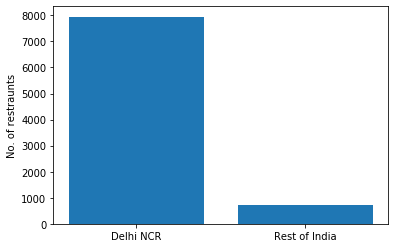

In [15]:
print('Total Restaurants', df.City.count())

# No of restaurants in Delhi NCR
print('Total restaurants in Delhi NCR', df[df.City == 'Delhi NCR'].City.count())

# No of restaurants in rest of India
print('Total restaurants in Rest of India', df[df.City != 'Delhi NCR'].City.count())

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting of graph
plt.bar(['Delhi NCR', 'Rest of India'], [7947,705])
plt.ylabel("No. of restraunts")
plt.show()

#### 1.2: Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [18]:
# Set of cuisines served in restaurants in delhi ncr
d1 = df[df['City']=='Delhi NCR']['Cuisines'].str.split(', ')
set1 = set().union(*d1)

# Set of cuisines served in restaurants in rest of India
d2 = df[df['City'] !='Delhi NCR']['Cuisines'].str.split(', ')
set2 = set().union(*d2)

# Set of cuisines served in rest of India but not in delhi is printed
print('Set of cuisines served in rest of India but not in delhi NCR', end = ' ')
print(set2 - set1)

import requests

# A request is made to zomato API and a new_set of cuisines is created for Delhi NCR (city id = 1)
h = {'user-key' : '6b6a3e454cd129f0b05ae29da66c5f9a'}
p = {'city_id' : 1}

r = requests.get('https://developers.zomato.com/api/v2.1/cuisines?city_id=1', headers = h, params = p)

new_set = set([]) 

for i in r.json()['cuisines']:
    new_set.add(i['cuisine']['cuisine_name']) 

# The set of elements printed in line 7 are checked for presense in new_set. If true, then incomplete dataset,
# if false then cuisine is actually not served in delhi ncr
for i in set2 - set1:
    print(i, i in new_set)

Set of cuisines served in rest of India but not in delhi NCR {'Cajun', 'BBQ', 'Malwani', 'German'}
Cajun False
BBQ True
Malwani True
German False


#### 1.3: Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

For Delhi NCR

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


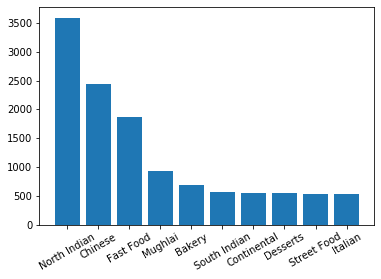

In [20]:
# A dictionary is created for cuisines served in Delhi NCR.
# Key = cuisine, Value = No. of restaurants that serve that cuisine
df1 = pd.DataFrame(d1) # d1 is defined in previous block
dic1 = {}
for index, row in df1.iterrows():
    for i in row['Cuisines']:
        dic1[i] = dic1.get(i,0) + 1

# arrays x and y are populated to plot graph
count = 0   
x = []
y = []
for w in sorted(dic1, key = dic1.get, reverse = True):
    x.append(w)
    y.append(dic1[w])
    print (w, dic1[w])
    count += 1
    if count == 10:
        break

# To plot required graph
plt.bar(x, y, align = 'center')
plt.xticks(range(len(x)), list(x), rotation = 30)
plt.show()

For Rest of India

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


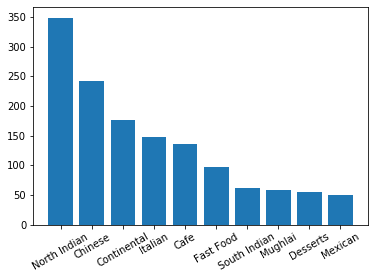

In [21]:
# Same as before
df2 = pd.DataFrame(d2)
dic2 = {}
for index, row in df2.iterrows():
    for i in row['Cuisines']:
        dic2[i] = dic2.get(i,0) + 1
count = 0   
x = []
y = []
for w in sorted(dic2, key = dic2.get, reverse=True):
    x.append(w)
    y.append(dic2[w])
    print (w, dic2[w])
    count += 1
    if count == 10:
        break
        
plt.bar(x, y, align = 'center')
plt.xticks(range(len(x)), list(x), rotation = 30)
plt.show()

#### 1.4: Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

1. North Indian and Chinese cusines are served the most, both in Delhi NCR and Rest of India
2. After that, fast food and mughlai is more popular in Delhi NCR while continental and Italian restaurants in Rest of the India
3. Overall number of restaurants registered with Zomato is much more in Delhi NCR than in Rest of India.
4. Previous 2 graphs are depicting these trends well

### Question 2: User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

#### 2.1: Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

##### 2.1.1: Number of Votes given Restaurant

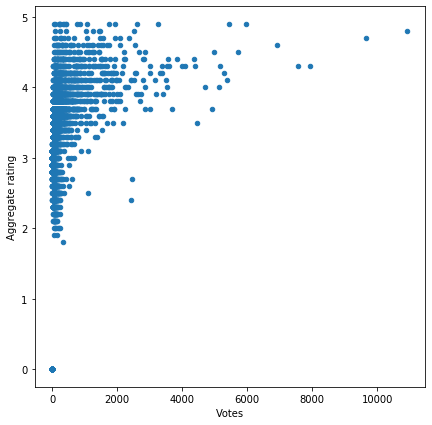

In [13]:
import numpy as np

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')
df = df[df['Country Code'] == 1]
df1 = df[['Aggregate rating','Votes']]
df1 = df1.sort_values(['Votes'], ascending=[True])
df1

import matplotlib.pyplot as plt
%matplotlib inline

df1.plot(x='Votes', y='Aggregate rating', kind = 'scatter', figsize = (7,7))

For votes < 2000 No particular trend can be seen.

For votes > 4000 Ratings go up as number of votes increase (maybe because restaurant is good that's why more     people are visiting the restaurant)

##### 2.1.2: Restaurant serving more number of cuisines.

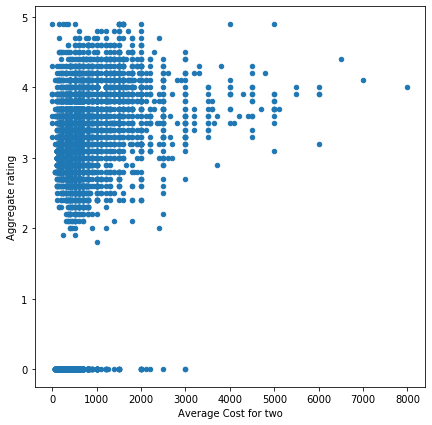

In [14]:
df_India = df[df['Country Code']==1]
df2 = df_India[['Average Cost for two','Aggregate rating']]
df2.plot(x='Average Cost for two', y='Aggregate rating', kind = 'scatter', figsize = (7,7))

Only Indian restaurants are considered because different currencies in different countries.

No trend can be seen for cost < 3000

For cost > 3000, rating is > 3

##### 2.1.3: Average Cost of Restaurant

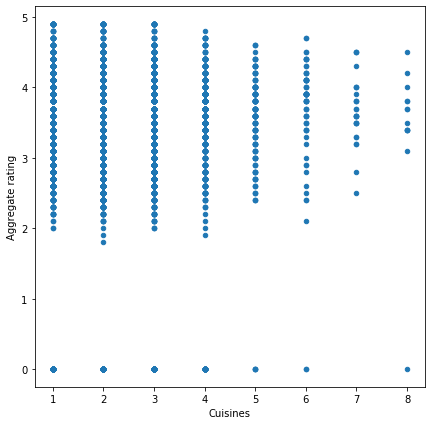

In [10]:
df3 = df[['Cuisines', 'Aggregate rating']]
df3 = df3[df3['Cuisines'].notnull()]

def f(a):
    if a is np.nan :
        return 0
    s = a.split(',')
    return len(s)

df3['Cuisines'] = df3['Cuisines'].apply(lambda x: f(x))
df3.plot(x = 'Cuisines', y = 'Aggregate rating', kind = 'scatter', figsize = (7, 7))

No trend whatsoever

##### 2.1.4: Restaurant serving some specific cuisines.

In [11]:
df4 = df[['Cuisines', 'Aggregate rating']]
df4 = df4[df4['Cuisines'].notnull()]


def f(a):
    s = a.split(',')
    return s

df4['Cuisines'] = df4['Cuisines'].apply(lambda x: f(x))

df4.reset_index(inplace = True)
rows = []
_ = df4.apply(lambda row: [rows.append([row['Aggregate rating'], nn])for nn in row.Cuisines], axis = 1)
df_new = pd.DataFrame(rows, columns = ['rating', 'cuisine'])


dfx = (df_new.groupby('cuisine')['rating'].agg(('count', 'mean')).reset_index())
dfx = dfx.sort_values(['count'], ascending = [False])

dfx

,cuisine,count,mean
209,North Indian,2992,2.399699
33,Chinese,1880,2.755319
46,Fast Food,1314,2.671537
92,North Indian,968,2.852789
157,Chinese,855,2.325731
...,...,...,...
221,Ramen,1,4.600000
162,Cuisine Varies,1,0.000000
161,Cuban,1,4.400000
83,Mineira,1,0.000000


Number of cuisines are too many to plot, hence only dataframe is shown

Each cuisine has very different number of restaurants which serve that cuisine
therefore, more popular cuisines actually have very less average rating
hence no conclusions can be made

#### 2.2: Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

##### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [12]:
# A new column 'prod' is created which is the product of rating into votes
df['prod'] = df['Aggregate rating'] * df['Votes']

# data is grouped by locality and sum of votes and prod for each locality is calculated, the result is stored in 'a'
a = df.groupby("Locality").sum()
a = a[['Votes','prod']]

# A new column w_rating is created which is a['prod'] / a['Votes']
a['w_rating'] = a['prod']/a['Votes']

# Localities are listed in a decreasing order of weighted rating
a = a.sort_values(['w_rating'], ascending=[False])
a.head(10)

,Votes,prod,w_rating
Locality,,,
Penjaringan,605,2964.5,4.9
Aminabad,1057,5179.3,4.9
Cengkareng,1662,8143.8,4.9
"Barwa Towers, Al Sadd",182,891.8,4.9
Kenwood,1424,6977.6,4.9
"Hotel Clarks Amer, Malviya Nagar",322,1577.8,4.9
"Venetian Village, Al Maqtaa",216,1058.4,4.9
Setor De Clubes Esportivos Sul,30,147.0,4.9
Caddebostan,522,2557.8,4.9


### Question 3: Visualization

#### 3.1: Plot the bar graph for top 15 restaurants have a maximum number of outlets.

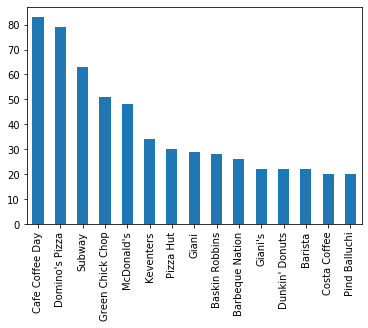

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('zomato.csv', encoding = 'ISO-8859-1')

df['Restaurant Name'].value_counts().head(15).plot(kind='bar')

#### 3.2: Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f0c2db250>]],
      dtype=object)

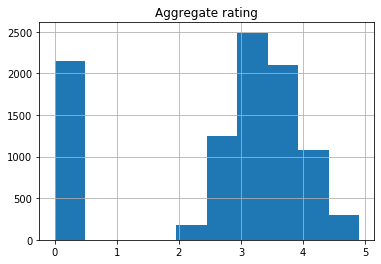

In [27]:
df2 = df[df['Aggregate rating'].notnull()]
df2.hist(column = 'Aggregate rating')

#### 3.3: Plot the bar graph top 10 restaurants in the data with the highest number of votes.

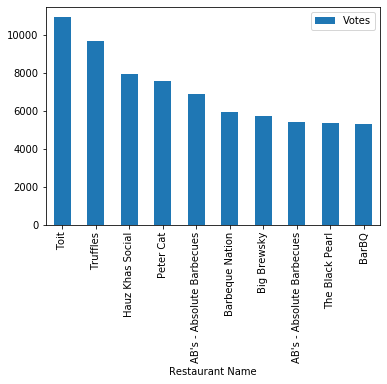

In [28]:
df3 = df.sort_values(['Votes'], ascending=[False]).head(10)
df3.plot(x='Restaurant Name', y='Votes', kind = 'bar')

#### 3.4: Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In the following code I first split the cuisines and made seperate row for each cuisine.
Then I count the number of each cuisines present in datafram and sorted and took top 10

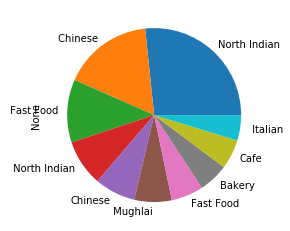

In [30]:
df4 = df[df['Country Code'] == 216]
df4 = df[['Cuisines']]
df4 = df4[df4['Cuisines'].notnull()]

def f(a):
    s = a.split(',')
    return s

df4['Cuisines'] = df4['Cuisines'].apply(lambda x: f(x))

df4.reset_index(inplace = True)
rows = []
_ = df4.apply(lambda row: [rows.append([nn])for nn in row.Cuisines], axis = 1)

df_new = pd.DataFrame(rows, columns = ['cuisine'])

df_new.groupby('cuisine').size().sort_values(ascending=False).head(10).plot(kind = 'pie')

#### 3.5: Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

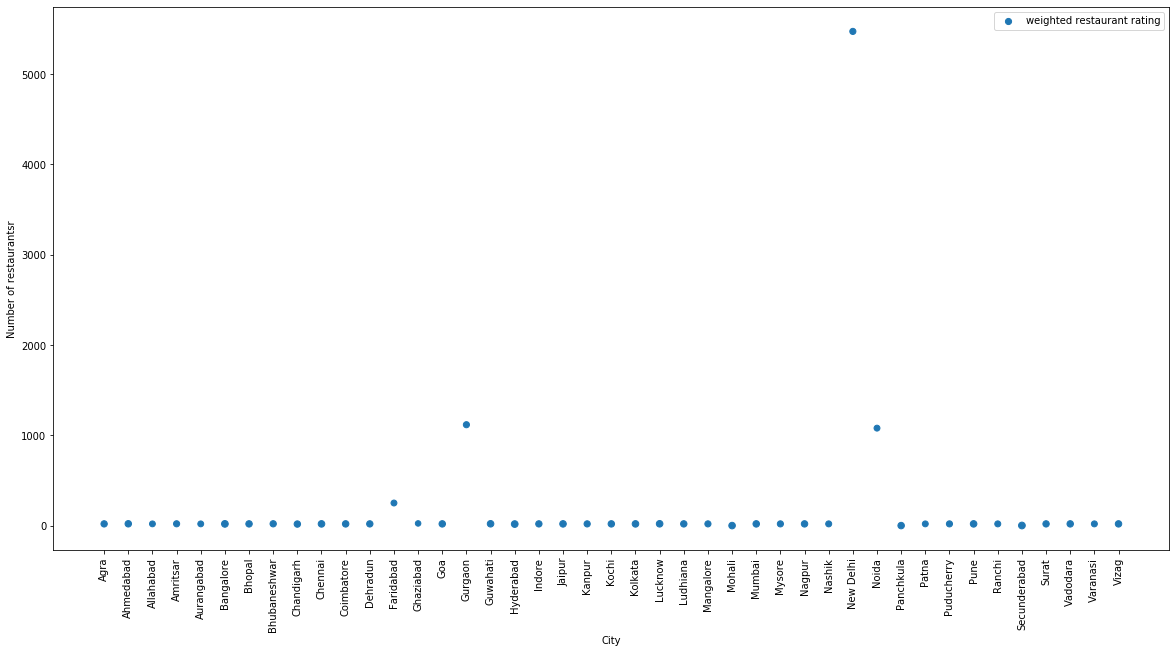

In [36]:
df5 = df[df['Country Code'] == 1].copy(deep = True)
pd.options.mode.chained_assignment = None
df5['prod'] = df5['Aggregate rating'] * df5['Votes']

a = df5.groupby("City").agg(['sum', 'count'])
a = a[['Votes','prod']]
a['w'] = a['prod']['sum'] / a['Votes']['sum']
a = a[['w', 'Votes']] 
a.columns = a.columns.droplevel()
del a['sum']

a = a.reset_index(drop = False)

a.columns = ['City', 'w', 'count']

xi = np.array(a['City'])
yi = np.array(a['count'])
si = np.array(a['w'])

plt.figure(figsize = (20, 10))
plt.scatter(x = xi, y = yi, s = si * 10, marker = 'o')
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('Number of restaurantsr')
plt.legend(['weighted restaurant rating'])

plt.show()